In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("games.csv")

In [3]:
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


In [4]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [16]:
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration,rating_diff
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0.0,309


In [19]:
# Convert from milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')

# Now safely calculate duration
df['duration'] = df['last_move_at'] - df['created_at']
df['duration_mins'] = df['duration'].dt.total_seconds() / 60


In [20]:
df['duration'] = df['last_move_at'] - df['created_at']
df['duration_mins'] = df['duration'].dt.total_seconds() / 60

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')


In [ ]:
df.head()

In [21]:
df['rating_diff'] = abs(df['white_rating'] - df['black_rating'])

sns.set(style="whitegrid")

In [22]:
df['duration'] = df['last_move_at'] - df['created_at']

In [ ]:
df.head(1)

In [ ]:
df.drop(columns=["start_time","end_time"], inplace=True )

In [ ]:
df.head(1)

# Normal Analytics

In [ ]:
df["winner"].value_counts()

In [ ]:
round(df["winner"].value_counts(normalize=True)*100)

In [ ]:
df["opening_name"].value_counts().head(10)

In [ ]:
top_openings = df['opening_name'].value_counts().head(20).index
df[df['opening_name'].isin(top_openings)].groupby(['opening_name', 'winner']).size()


In [ ]:
df['duration_mins'].describe()
df[['duration_mins', 'turns']].corr()  # Correlation



In [ ]:
df.groupby('rated')['duration_mins'].describe()
df.groupby('rated')['turns'].mean()


In [ ]:
df['opening_ply'].describe()
df.groupby('winner')['opening_ply'].mean()


In [ ]:
df['date'] = df['created_at'].dt.date
df['date'].value_counts().sort_index().head(10)  # Earliest days
df['date'].value_counts().sort_index().tail(10)  # Recent days


In [ ]:


df.head(1)

winner
white    49.860405
black    45.403330
draw      4.736265
Name: proportion, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7908\502461567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=df, palette="magma" )


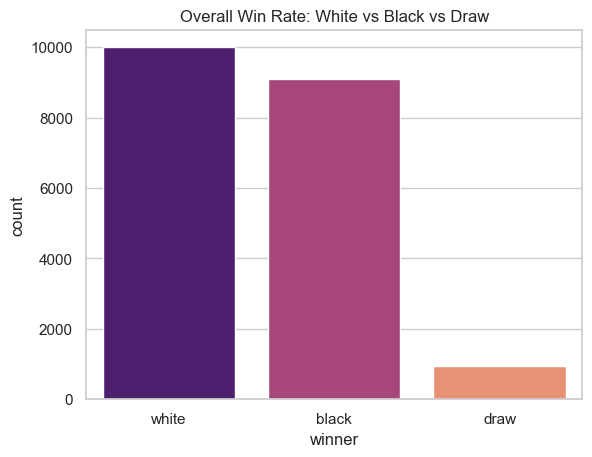

In [23]:
# 1️⃣ What is the win rate of White vs Black overall?

print(df['winner'].value_counts(normalize=True) * 100)

sns.countplot(x='winner', data=df, palette="magma" )
plt.title("Overall Win Rate: White vs Black vs Draw")
plt.show()

opening_name                      winner
French Defense: Knight Variation  black     121
                                  draw       15
                                  white     135
Scotch Game                       black     115
                                  draw       11
                                  white     145
Sicilian Defense                  black     194
                                  draw       15
                                  white     149
Sicilian Defense: Bowdler Attack  black     164
                                  draw       13
                                  white     119
Van't Kruijs Opening              black     226
                                  draw       16
                                  white     126
dtype: int64


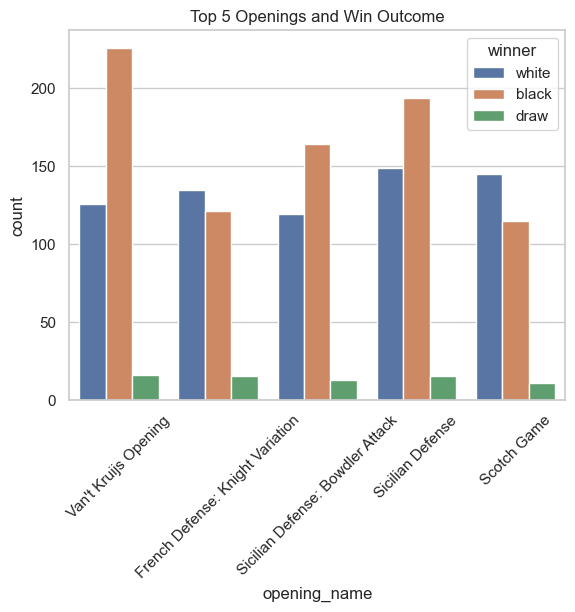

In [24]:
# 2️⃣ Which openings lead to highest win rates for White or Black?

top_openings = df['opening_name'].value_counts().head(5).index
subset = df[df['opening_name'].isin(top_openings)]

print(subset.groupby(['opening_name', 'winner']).size())

sns.countplot(x='opening_name', hue='winner', data=subset)
plt.xticks(rotation=45)
plt.title("Top 5 Openings and Win Outcome")
plt.show()

          count       mean         std  min  25%       50%        75%  \
winner                                                                  
black    9107.0  13.912524   38.373384  0.0  0.0  4.043733  13.266858   
draw      950.0  23.310469   63.332069  0.0  0.0  8.589158  19.483521   
white   10001.0  14.188257  105.751413  0.0  0.0  3.701083  12.704817   

                 max  
winner                
black    1500.000000  
draw     1500.000000  
white   10097.411683  


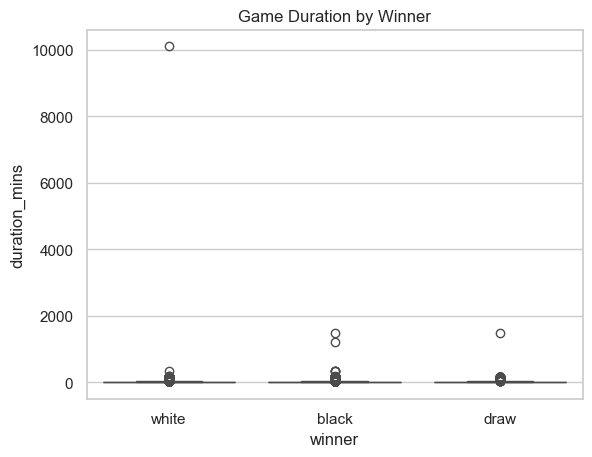

In [25]:
# 3️⃣ How does game duration (in minutes) vary by result?

print(df.groupby('winner')['duration_mins'].describe())

sns.boxplot(x='winner', y='duration_mins', data=df)
plt.title("Game Duration by Winner")
plt.show()

         count       mean         std  min  25%       50%        75%  \
rated                                                                  
False   3903.0  19.057855  168.936909  0.0  0.0  3.444217  14.122125   
True   16155.0  13.392774   33.067631  0.0  0.0  4.113233  13.095350   

                max  
rated                
False  10097.411683  
True    1205.823167  


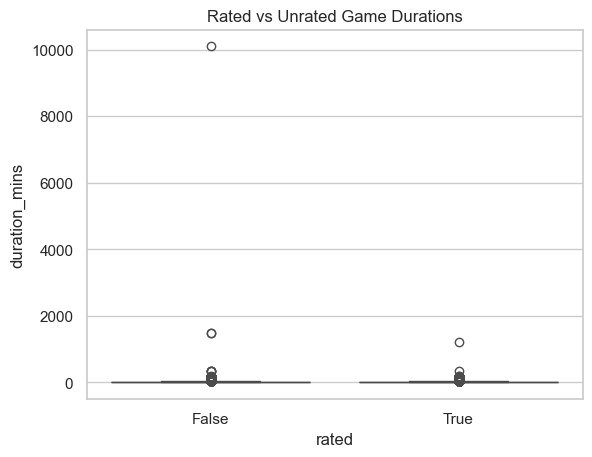

In [26]:
# 4️⃣ Do rated games last longer than unrated ones?

print(df.groupby('rated')['duration_mins'].describe())

sns.boxplot(x='rated', y='duration_mins', data=df)
plt.title("Rated vs Unrated Game Durations")
plt.show()

winner
black    172.111453
draw     147.628421
white    176.402560
Name: rating_diff, dtype: float64


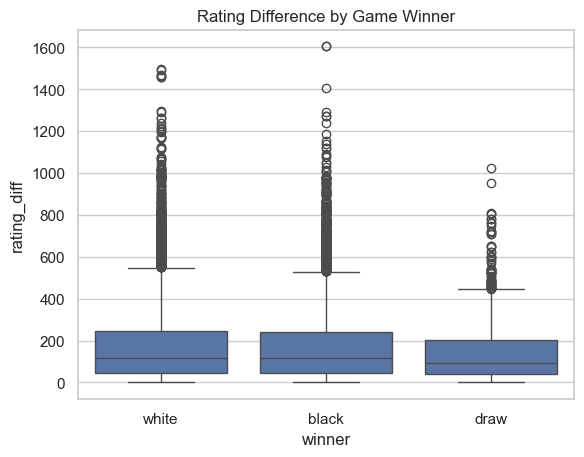

In [11]:
# 5️⃣ What is the average rating difference between winners and losers?

print(df.groupby('winner')['rating_diff'].mean())

sns.boxplot(x='winner', y='rating_diff', data=df)
plt.title("Rating Difference by Game Winner")
plt.show()

opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64


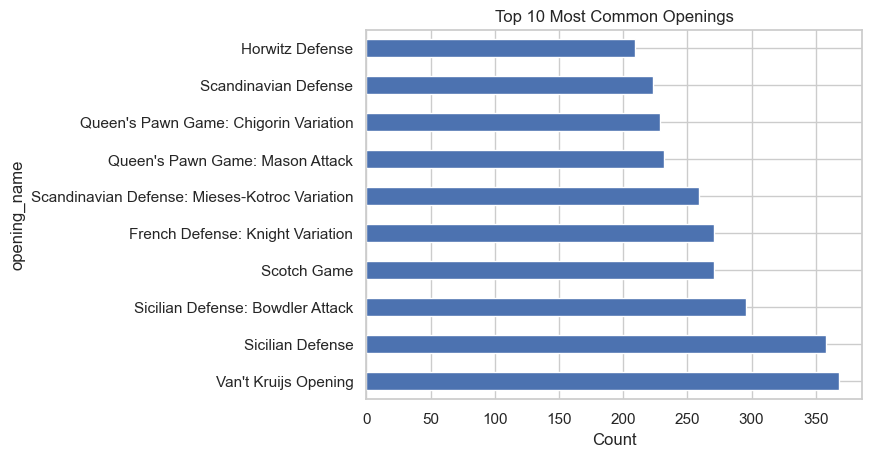

In [27]:
# 6️⃣ What are the most common openings in the dataset?

print(df['opening_name'].value_counts().head(10))

df['opening_name'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Most Common Openings")
plt.xlabel("Count")
plt.show()

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64


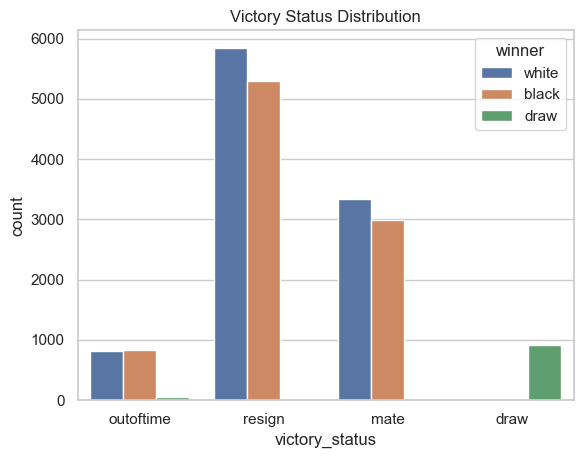

In [28]:
# 7️⃣ Which game outcomes are most common?


print(df['victory_status'].value_counts())

sns.countplot(x='victory_status', hue='winner', data=df)
plt.title("Victory Status Distribution")
plt.show()

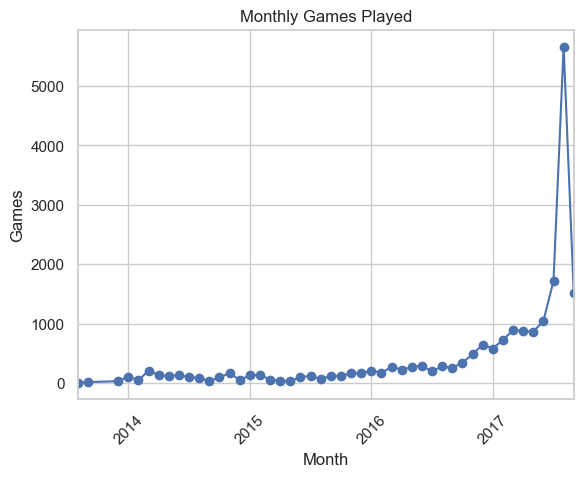

In [29]:
# 8️⃣ How many games were played over time (monthly trend)?

df['month'] = df['created_at'].dt.to_period('M')
monthly_games = df['month'].value_counts().sort_index()

monthly_games.plot(kind='line', marker='o')
plt.title("Monthly Games Played")
plt.ylabel("Games")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

winner
black    4.742396
draw     5.056842
white    4.862114
Name: opening_ply, dtype: float64


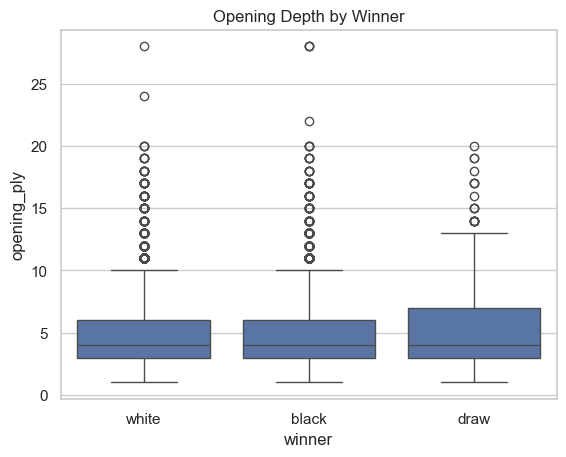

In [30]:
# 9️⃣ Do longer openings affect game outcome?

print(df.groupby('winner')['opening_ply'].mean())

sns.boxplot(x='winner', y='opening_ply', data=df)
plt.title("Opening Depth by Winner")
plt.show()


winner
black    60.724388
draw     86.157895
white    57.790221
Name: turns, dtype: float64


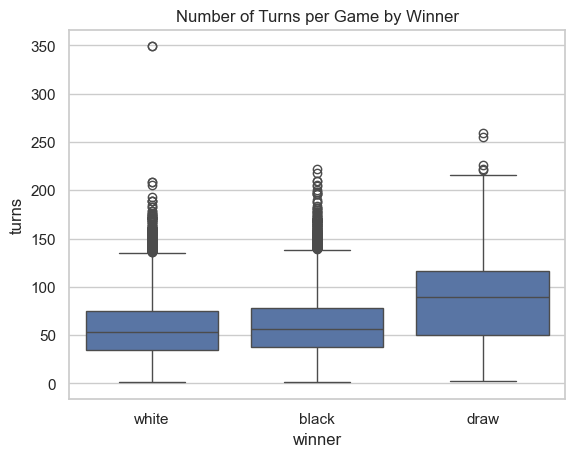

In [31]:
# 🔟 What is the average number of turns per game by result?

print(df.groupby('winner')['turns'].mean())

sns.boxplot(x='winner', y='turns', data=df)
plt.title("Number of Turns per Game by Winner")
plt.show()

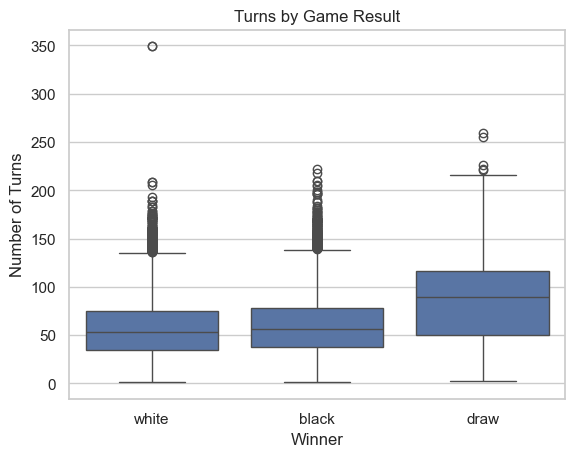

In [32]:
 # Do longer games (more turns) end more often in draws or wins?

sns.boxplot(x='winner', y='turns', data=df)
plt.title("Turns by Game Result")
plt.xlabel("Winner")
plt.ylabel("Number of Turns")
plt.show()

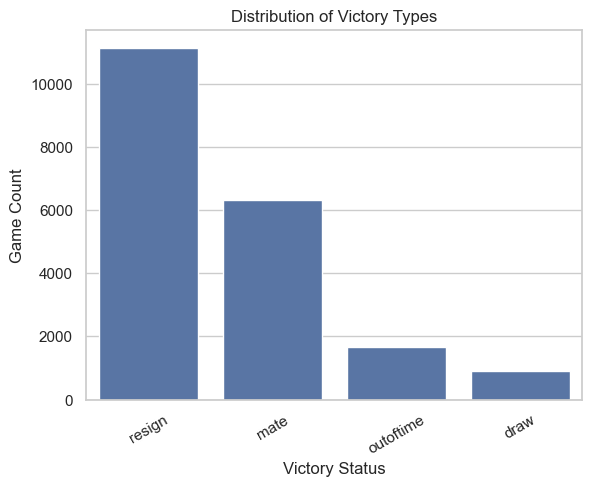

In [33]:
 # How often do games end by resignation vs checkmate vs timeout?

sns.countplot(x='victory_status', data=df, order=df['victory_status'].value_counts().index)
plt.title("Distribution of Victory Types")
plt.xlabel("Victory Status")
plt.ylabel("Game Count")
plt.xticks(rotation=30)
plt.show()


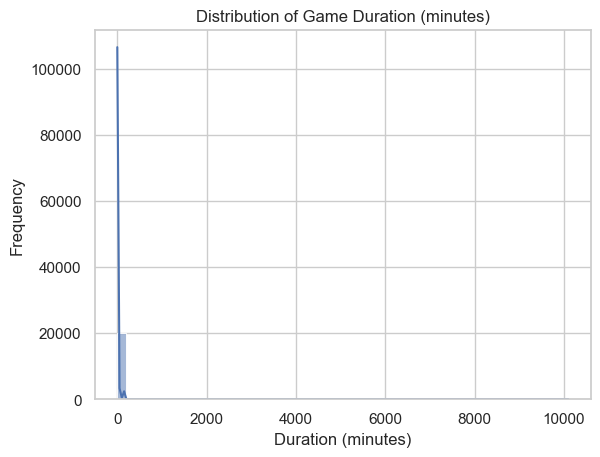

In [34]:
 # What is the distribution of game durations?

sns.histplot(df['duration_mins'], bins=50, kde=True)
plt.title("Distribution of Game Duration (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

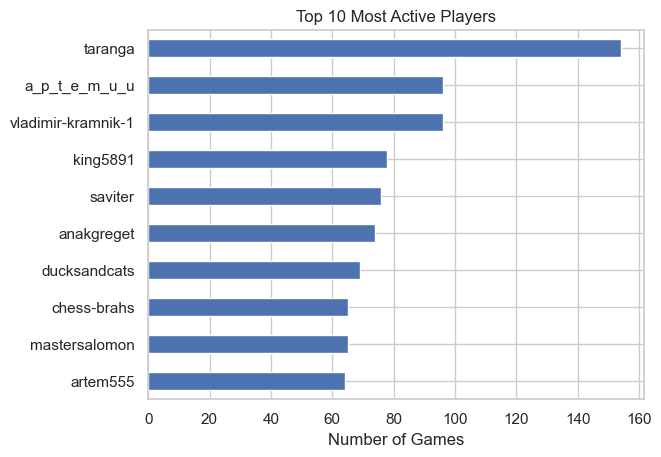

In [35]:
 # Which players appear most frequently in the dataset?

top_players = pd.concat([df['white_id'], df['black_id']]).value_counts().head(10)
top_players.plot(kind='barh')
plt.title("Top 10 Most Active Players")
plt.xlabel("Number of Games")
plt.gca().invert_yaxis()
plt.show()

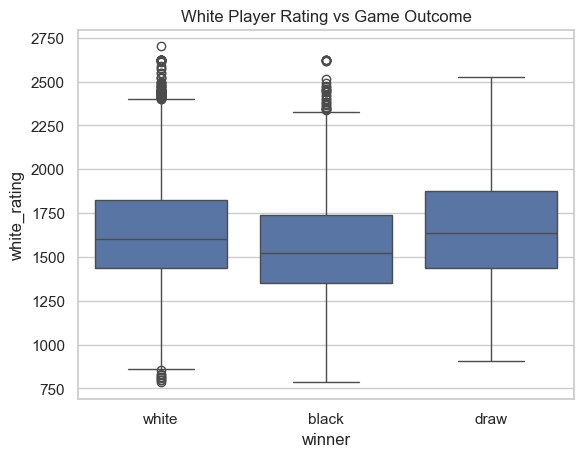

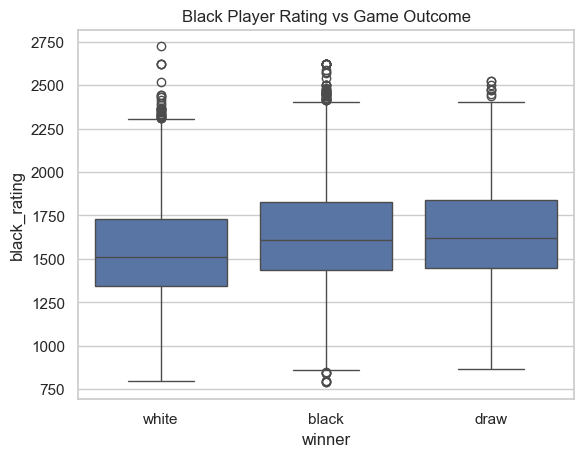

In [36]:

# How does player rating affect the outcome?

sns.boxplot(x='winner', y='white_rating', data=df)
plt.title("White Player Rating vs Game Outcome")
plt.show()

sns.boxplot(x='winner', y='black_rating', data=df)
plt.title("Black Player Rating vs Game Outcome")
plt.show()

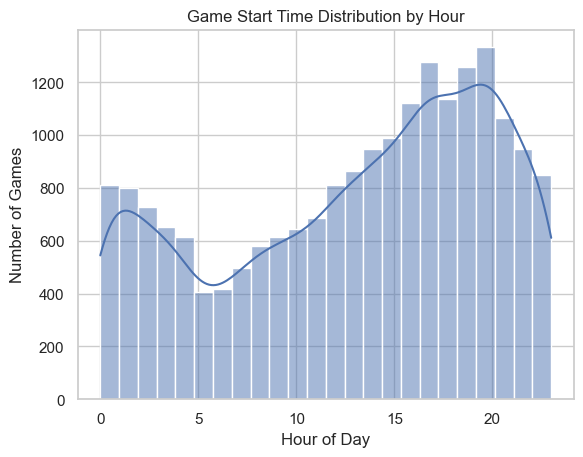

In [38]:
 # What time of day are games usually played?

df['hour'] = df['created_at'].dt.hour
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Game Start Time Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Games")
plt.show()


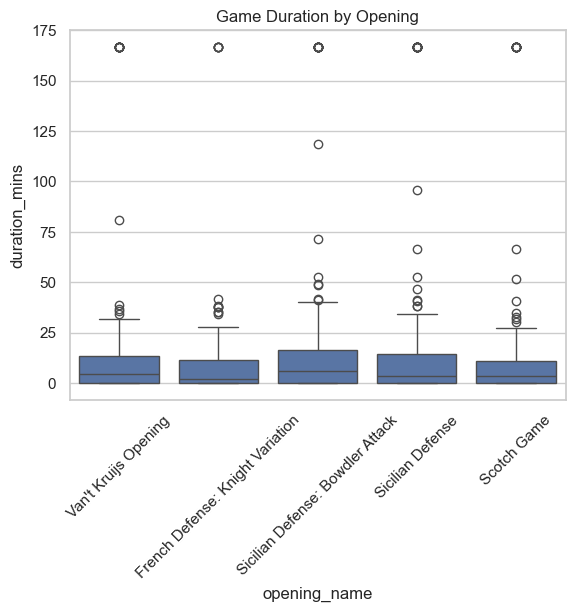

In [39]:
 # Do different openings lead to different game durations?

top_openings = df['opening_name'].value_counts().head(5).index
subset = df[df['opening_name'].isin(top_openings)]
sns.boxplot(x='opening_name', y='duration_mins', data=subset)
plt.title("Game Duration by Opening")
plt.xticks(rotation=45)
plt.show()
